[< __INTRO MODULE 4__](../Introduction.ipynb)

---

## Introduction

We can say that that's what REST was invented for. Thanks to it, very different programs written in very different technologies can utilize shared data through one, __universal interface__.

The interface itself enables the __user to perform a basic set of operations__ – they are elementary, but complex enough to build complex services. A set of four operations hides beneath the following mysterious acronym `CRUD`.

`CRUD` stands for:
- __C__: Create (POST)
- __R__: Read (GET)
- __U__: Update (PUT)
- __D__: Delete (DELETE)

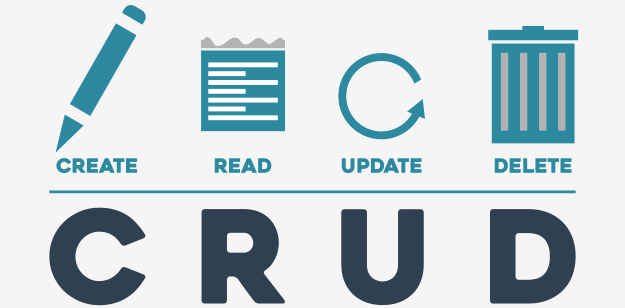

---



---

[< __INTRO MODULE 4__](../Introduction.ipynb)